In [1]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print('k labels are:',kmeans.labels_)
print('predict results are:',kmeans.predict([[0, 0], [4, 4]]))
print('cluster centers are:',kmeans.cluster_centers_)

k labels are: [0 0 0 1 1 1]
predict results are: [0 1]
cluster centers are: [[1. 2.]
 [4. 2.]]


In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf=KMeans(n_clusters=3)
model=clf.fit(X)
predicted=model.predict(X)
print(predicted)

NameError: name 'KMeans' is not defined

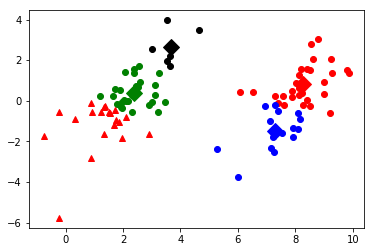

In [6]:
#coding=utf-8
from numpy import *

def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float, curLine)
        dataMat.append(fltLine)
    return dataMat
    
#计算两个向量的距离，用的是欧几里得距离
def distEclud(vecA, vecB):
    return sqrt(sum(power( vecA - vecB, 2)))

#随机选K个点作为种子    
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids
    
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        #print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment
    
def show(dataSet, k, centroids, clusterAssment):
    from matplotlib import pyplot as plt  
    numSamples, dim = dataSet.shape  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
    plt.show()
      
def main():    
    dataMat=loadtxt('testSet.txt')
    myCentroids, clustAssing= kMeans(dataMat,5)
    #print(myCentroids)
    show(dataMat, 4, myCentroids, clustAssing)      
    
if __name__ == '__main__':
    main()

In [8]:
# -*- coding: utf-8 -*-
import jieba 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def jieba_tokenize(text):
    return jieba.lcut(text) 

tf_vect = TfidfVectorizer(tokenizer=jieba_tokenize, lowercase=False)
text_list = ["小朋友高兴地跳了起来", "今年经济情况很差", \
"小明看起来难过极了", "李小龙武功真厉害","他下个月去上海工作","真是一个开心的周末","这件衣服太丑啦"]

 #聚类的文本集
#tfidf_matrix = tfidf_vectorizer.fit_transform(text_list) #训练+转换
tf_matrix = tf_vect.fit(text_list) #训练
print(tf_matrix.vocabulary_)
tf_matrix = tf_vect.transform(text_list) #转换
num_clusters = 3
km = KMeans(n_clusters=num_clusters, max_iter=300, n_init=1, \
                    init='k-means++',n_jobs=1)

km.fit(tf_matrix)
prt=km.predict(tf_matrix)
print("Predicting result: ", prt)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\stu\AppData\Local\Temp\jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built succesfully.


{'小朋友': 13, '高兴': 31, '地': 10, '跳': 28, '了': 3, '起来': 27, '今年': 4, '经济': 25, '情况': 17, '很差': 16, '小明': 12, '看起来': 22, '难过': 30, '极了': 19, '李小龙': 18, '武功': 20, '真': 23, '厉害': 6, '他': 5, '下个月': 2, '去': 7, '上海': 1, '工作': 14, '真是': 24, '一个': 0, '开心': 15, '的': 21, '周末': 8, '这件': 29, '衣服': 26, '太丑': 11, '啦': 9}
Predicting result:  [2 0 0 0 0 2 1]


Text(0, 0.5, 'Feature 1')

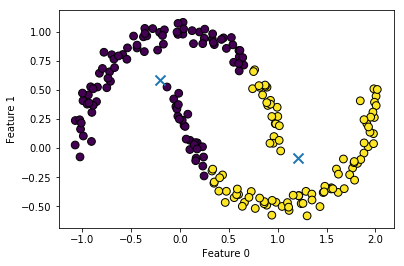

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x',  s=100, linewidth=2, edgecolor='k')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

[[-122.62432126   45.40780151]
 [-122.64147945   45.46815797]
 [-122.75896361   45.54733241]
 [-122.71594248   45.62041431]
 [-122.67145729   45.59807973]]
[[-122.595822     45.40978575]
 [-122.60757597   45.49981305]
 [-122.77401914   45.50119986]
 [-122.76690133   45.612314  ]
 [-122.61203287   45.55814373]]
[[-122.595822     45.40978575]
 [-122.59273051   45.5050802 ]
 [-122.75879455   45.48097164]
 [-122.76690133   45.612314  ]
 [-122.61308487   45.55653638]]
[[-122.54311867   45.41882033]
 [-122.57296204   45.50077829]
 [-122.75838933   45.47278083]
 [-122.76690133   45.612314  ]
 [-122.63095604   45.54611291]]
[[-122.54311867   45.41882033]
 [-122.55881033   45.501101  ]
 [-122.75334408   45.46622433]
 [-122.76690133   45.612314  ]
 [-122.63718596   45.54202381]]
[[-122.54311867   45.41882033]
 [-122.5437336    45.5025209 ]
 [-122.75334408   45.46622433]
 [-122.76690133   45.612314  ]
 [-122.6367999    45.53582739]]
[[-122.54311867   45.41882033]
 [-122.53036959   45.50561071]
 [

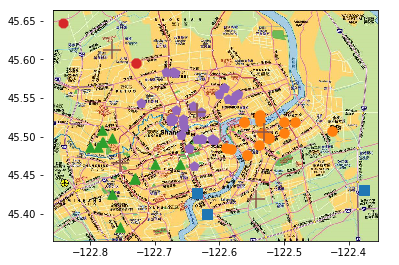

In [11]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids
    
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

import urllib
import json
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'  #create a dict and constants for the goecoder
    params = {}
    params['flags'] = 'J'#JSON return type
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print(yahooApi)
    c=urllib.urlopen(yahooApi)
    return json.loads(c.read())

from time import sleep
def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print("error fetching")
        sleep(1)
    fw.close()
    
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * \
                      cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy

import matplotlib
import matplotlib.pyplot as plt

numClust= 5  #k=5
datList = []
for line in open('places.txt').readlines():
    lineArr = line.split('\t')
    datList.append([float(lineArr[4]), float(lineArr[3])])
datMat = mat(datList)
myCentroids, clustAssing = kMeans(datMat, numClust, distMeas=distSLC)
fig = plt.figure()
rect=[0.1,0.1,0.8,0.8]
scatterMarkers=['s', 'o', '^', '8', 'p', \
                'd', 'v', 'h', '>', '<']
axprops = dict(xticks=[], yticks=[])
ax0=fig.add_axes(rect, label='ax0', **axprops)
imgP = plt.imread('shanghai.png')
ax0.imshow(imgP)
ax1=fig.add_axes(rect, label='ax1', frameon=False)
for i in range(numClust):
    ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
    markerStyle = scatterMarkers[i % len(scatterMarkers)]
    ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
plt.show()
